In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
zomato_data = pd.read_csv("Zomato-data.csv")
df = zomato_data.copy()
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
df = df.drop_duplicates()

In [4]:
df['rate'] = df['rate'].str.split('/').str[0].astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 0 to 148
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 9.2+ KB


Text(0.5, 0, 'Types of restaurant')

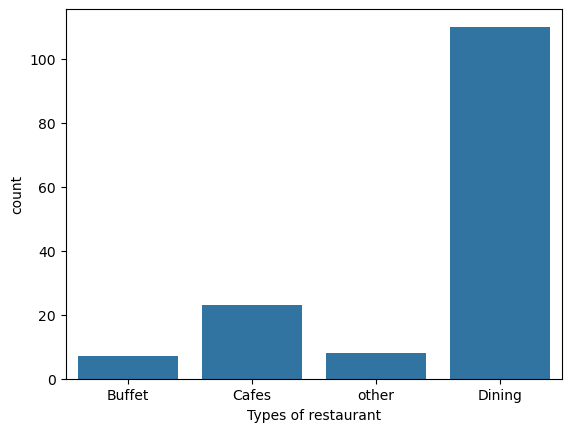

In [6]:
# Types of restaurant
sns.countplot(x = df['listed_in(type)'])
plt.xlabel("Types of restaurant")

*Conclusion: The majority of the restaurants fall into the dining category.*

Text(0.5, 1.0, 'Count of vots')

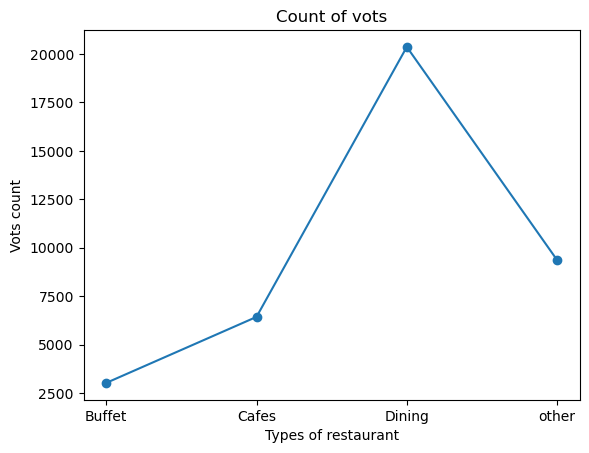

In [8]:
# Count of votes
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, marker='o')
plt.ylabel("Vots count")
plt.xlabel("Types of restaurant")
plt.title("Count of vots")

*Conclusion: Large number of individuals prefferred Dining restaurants*

In [10]:
# Identify the Most Voted Restaurant
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']
print("Restaurant with max votes:")
print(restaurant_with_max_votes)

Restaurant with max votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

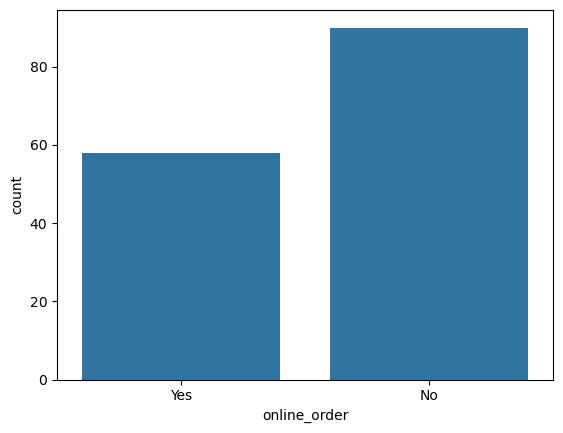

In [11]:
# Online availability
sns.countplot(x=df['online_order'])

Text(0.5, 1.0, 'Restaurant Rating')

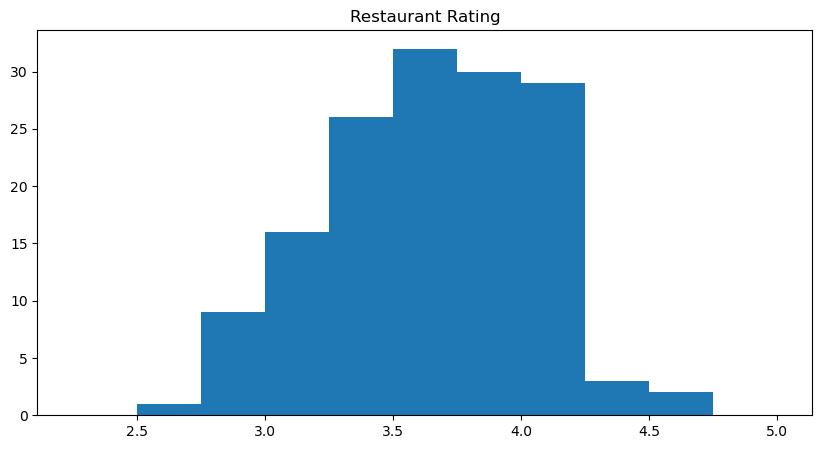

In [30]:
# Restaurant Rating
plt.figure(figsize=(10, 5))
plt.hist(df['rate'], bins=[2.25, 2.5, 2.75,3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5])
plt.title("Restaurant Rating")


*Conclusion: Majority of Restaurants have rating between 3.25 to 4.25*

37.16% of couples prefer restaurants with an cost range of 150-300 rupees


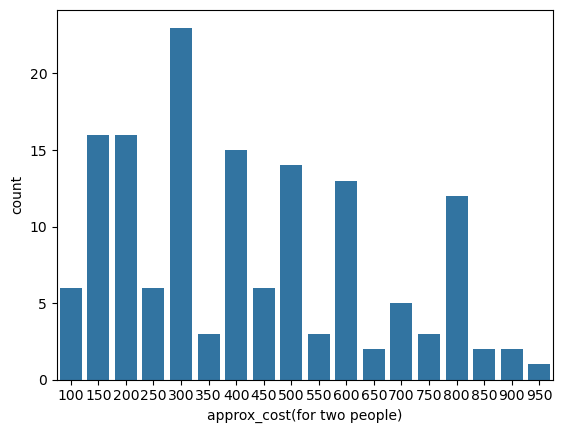

In [108]:
# Approximate Cost for Couples
per_of_person =((df['approx_cost(for two people)']
                .value_counts().head(3).sum()/
                 df['approx_cost(for two people)']
                .value_counts().sum())*100)
sns.countplot(x=df['approx_cost(for two people)'])
print(f"{per_of_person:.2f}% of couples prefer restaurants with an cost range of 150-300 rupees")

<Axes: xlabel='online_order', ylabel='rate'>

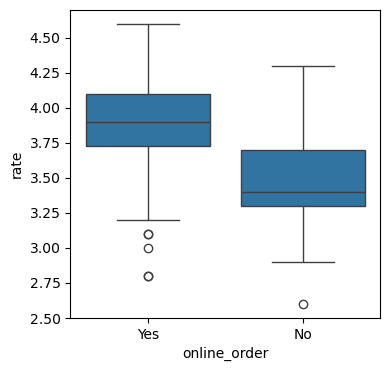

In [112]:
plt.figure(figsize=(4, 4))
sns.boxplot(x= 'online_order', y='rate', data= df)

*Conclusion: Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.*

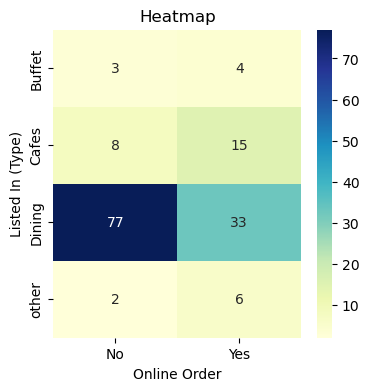

In [124]:
# Order Mode Preferences by Restaurant Type
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
plt.figure(figsize=(4, 4))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

*With this we can say that dining restaurants primarily accept offline orders whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes*